<a href="https://colab.research.google.com/github/Utkarshmishra2k2/Sleeping-Disorder-Data-Visualization/blob/main/Sleeping_Disorder_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:-**

Gaining knowledge and understanding the variables impacting sleep, health, and lifestyle habits are the goals of this data study.
We investigate the connections between sleep habits, health markers, and lifestyle elements by analyzing this information. We will look into the quantity and quality of sleep, stress levels, BMI categories, blood pressure, heart rate, daily steps, and the existence of sleep disorders.
We will identify patterns and trends using descriptive statistics, data visualization, and correlation analysis that might offer insightful information on the relationship between sleep, health, and lifestyle.

This study has the potential to provide solutions for raising physical activity levels, decreasing stress levels, and preserving general wellbeing.

We can find possible areas for improvement by comprehending the elements influencing sleep and wellness.

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy import stats

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Importing Data

In [ ]:
data_01 = pd.read_csv("https://raw.githubusercontent.com/UM1412/Data-Set/main/Sleep%20Health%20Data.csv")
data_01.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
326,327,Female,53,Engineer,8.3,9,30,3,Normal,125/80,65,5000,None
45,46,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
196,197,Male,43,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
72,73,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
250,251,Female,45,Teacher,6.8,7,30,6,Overweight,135/90,65,6000,Insomnia
50,51,Male,32,Engineer,7.5,8,45,3,Normal,120/80,70,8000,None
150,151,Female,39,Accountant,8.0,9,80,3,Normal Weight,115/78,67,7500,None
236,237,Male,44,Salesperson,6.4,6,45,7,Overweight,130/85,72,6000,Insomnia
67,68,Male,33,Doctor,6.0,6,30,8,Normal,125/80,72,5000,Insomnia
100,101,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,None


In [ ]:
data_01.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

# Data Processing

In [ ]:
data_01[["BloodPressure01","BloodPressure02"]] = data_01["Blood Pressure"].str.split("/",expand = True).astype(int)

In [ ]:
data_01.drop(columns="Person ID",inplace = True)
data_01.drop(columns="Blood Pressure",inplace = True)

In [ ]:
data_01["BMI Category"] = data_01["BMI Category"].replace("Normal Weight","Normal")

In [ ]:
data_01["BMI Category"].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [ ]:
catr_var = ["Gender","Occupation","BMI Category"]

# Data Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

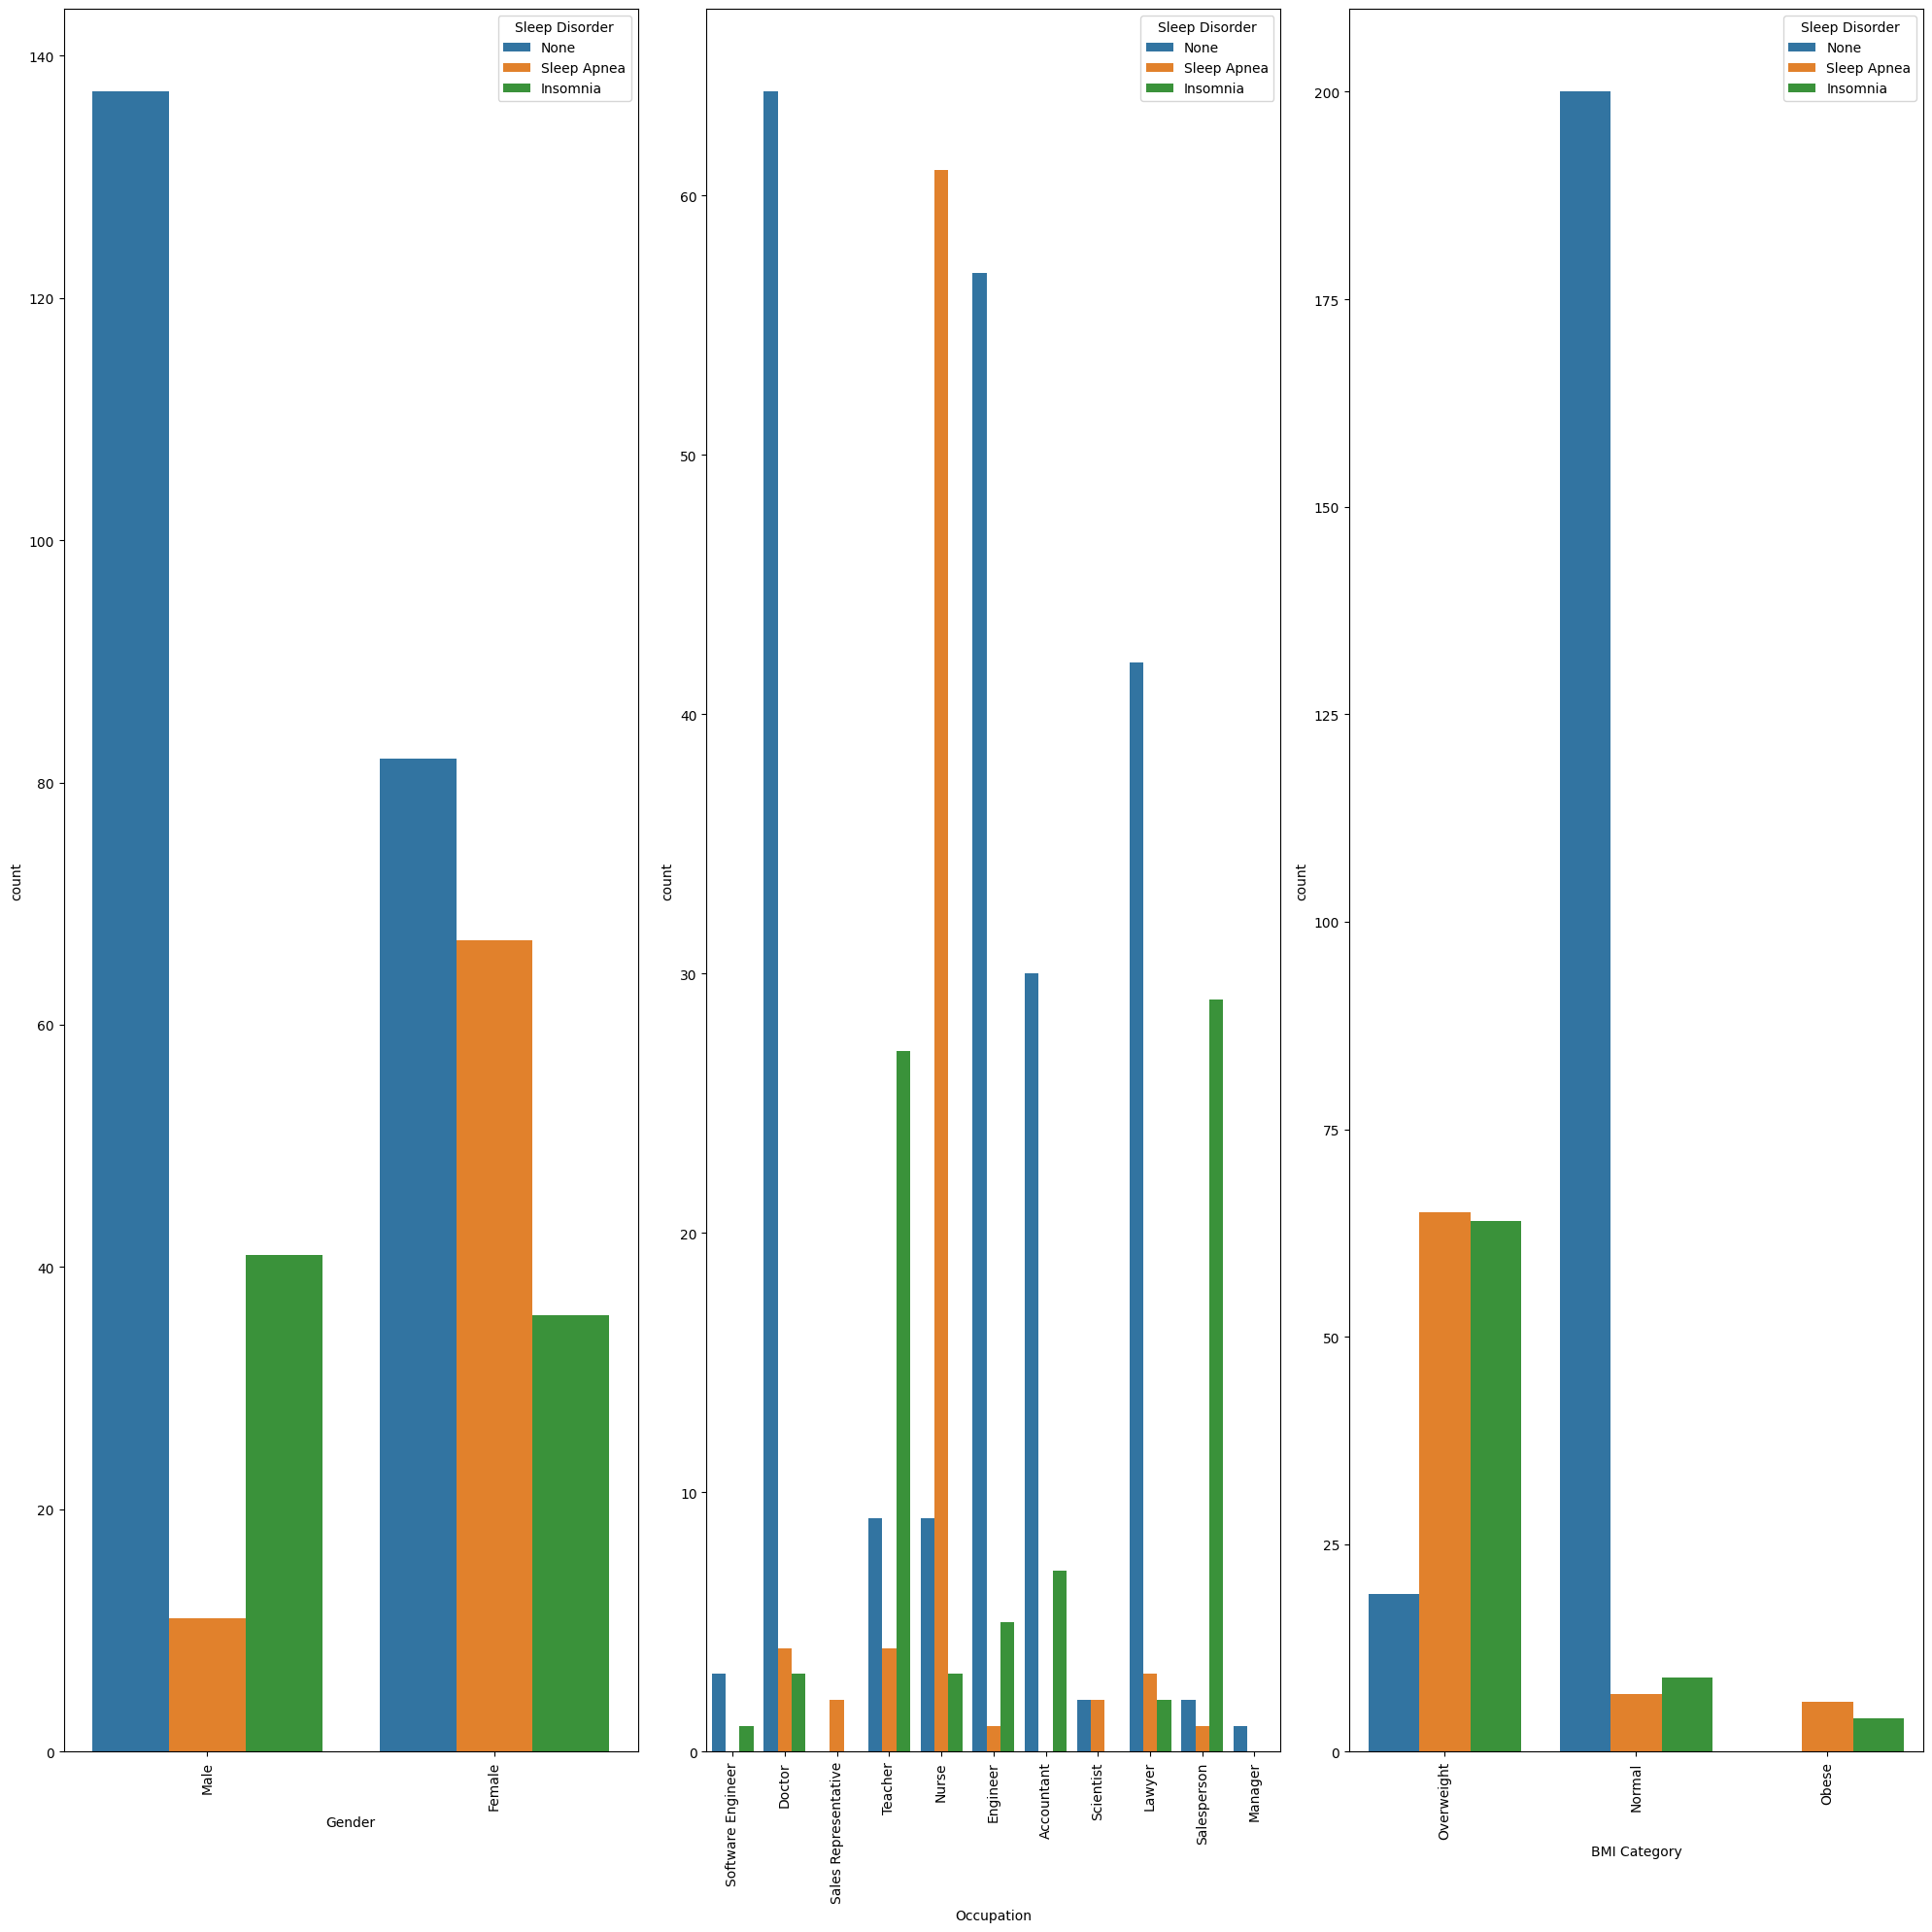

In [ ]:
fig,axs = plt.subplots(nrows = 1,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i,var in enumerate(catr_var):
    sns.countplot(x=var, hue="Sleep Disorder", data=data_01, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show

<ipython-input-12-e4f55168c38f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels (data_01[var].unique(), rotation=90)
<ipython-input-12-e4f55168c38f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels (data_01[var].unique(), rotation=90)
<ipython-input-12-e4f55168c38f>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels (data_01[var].unique(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

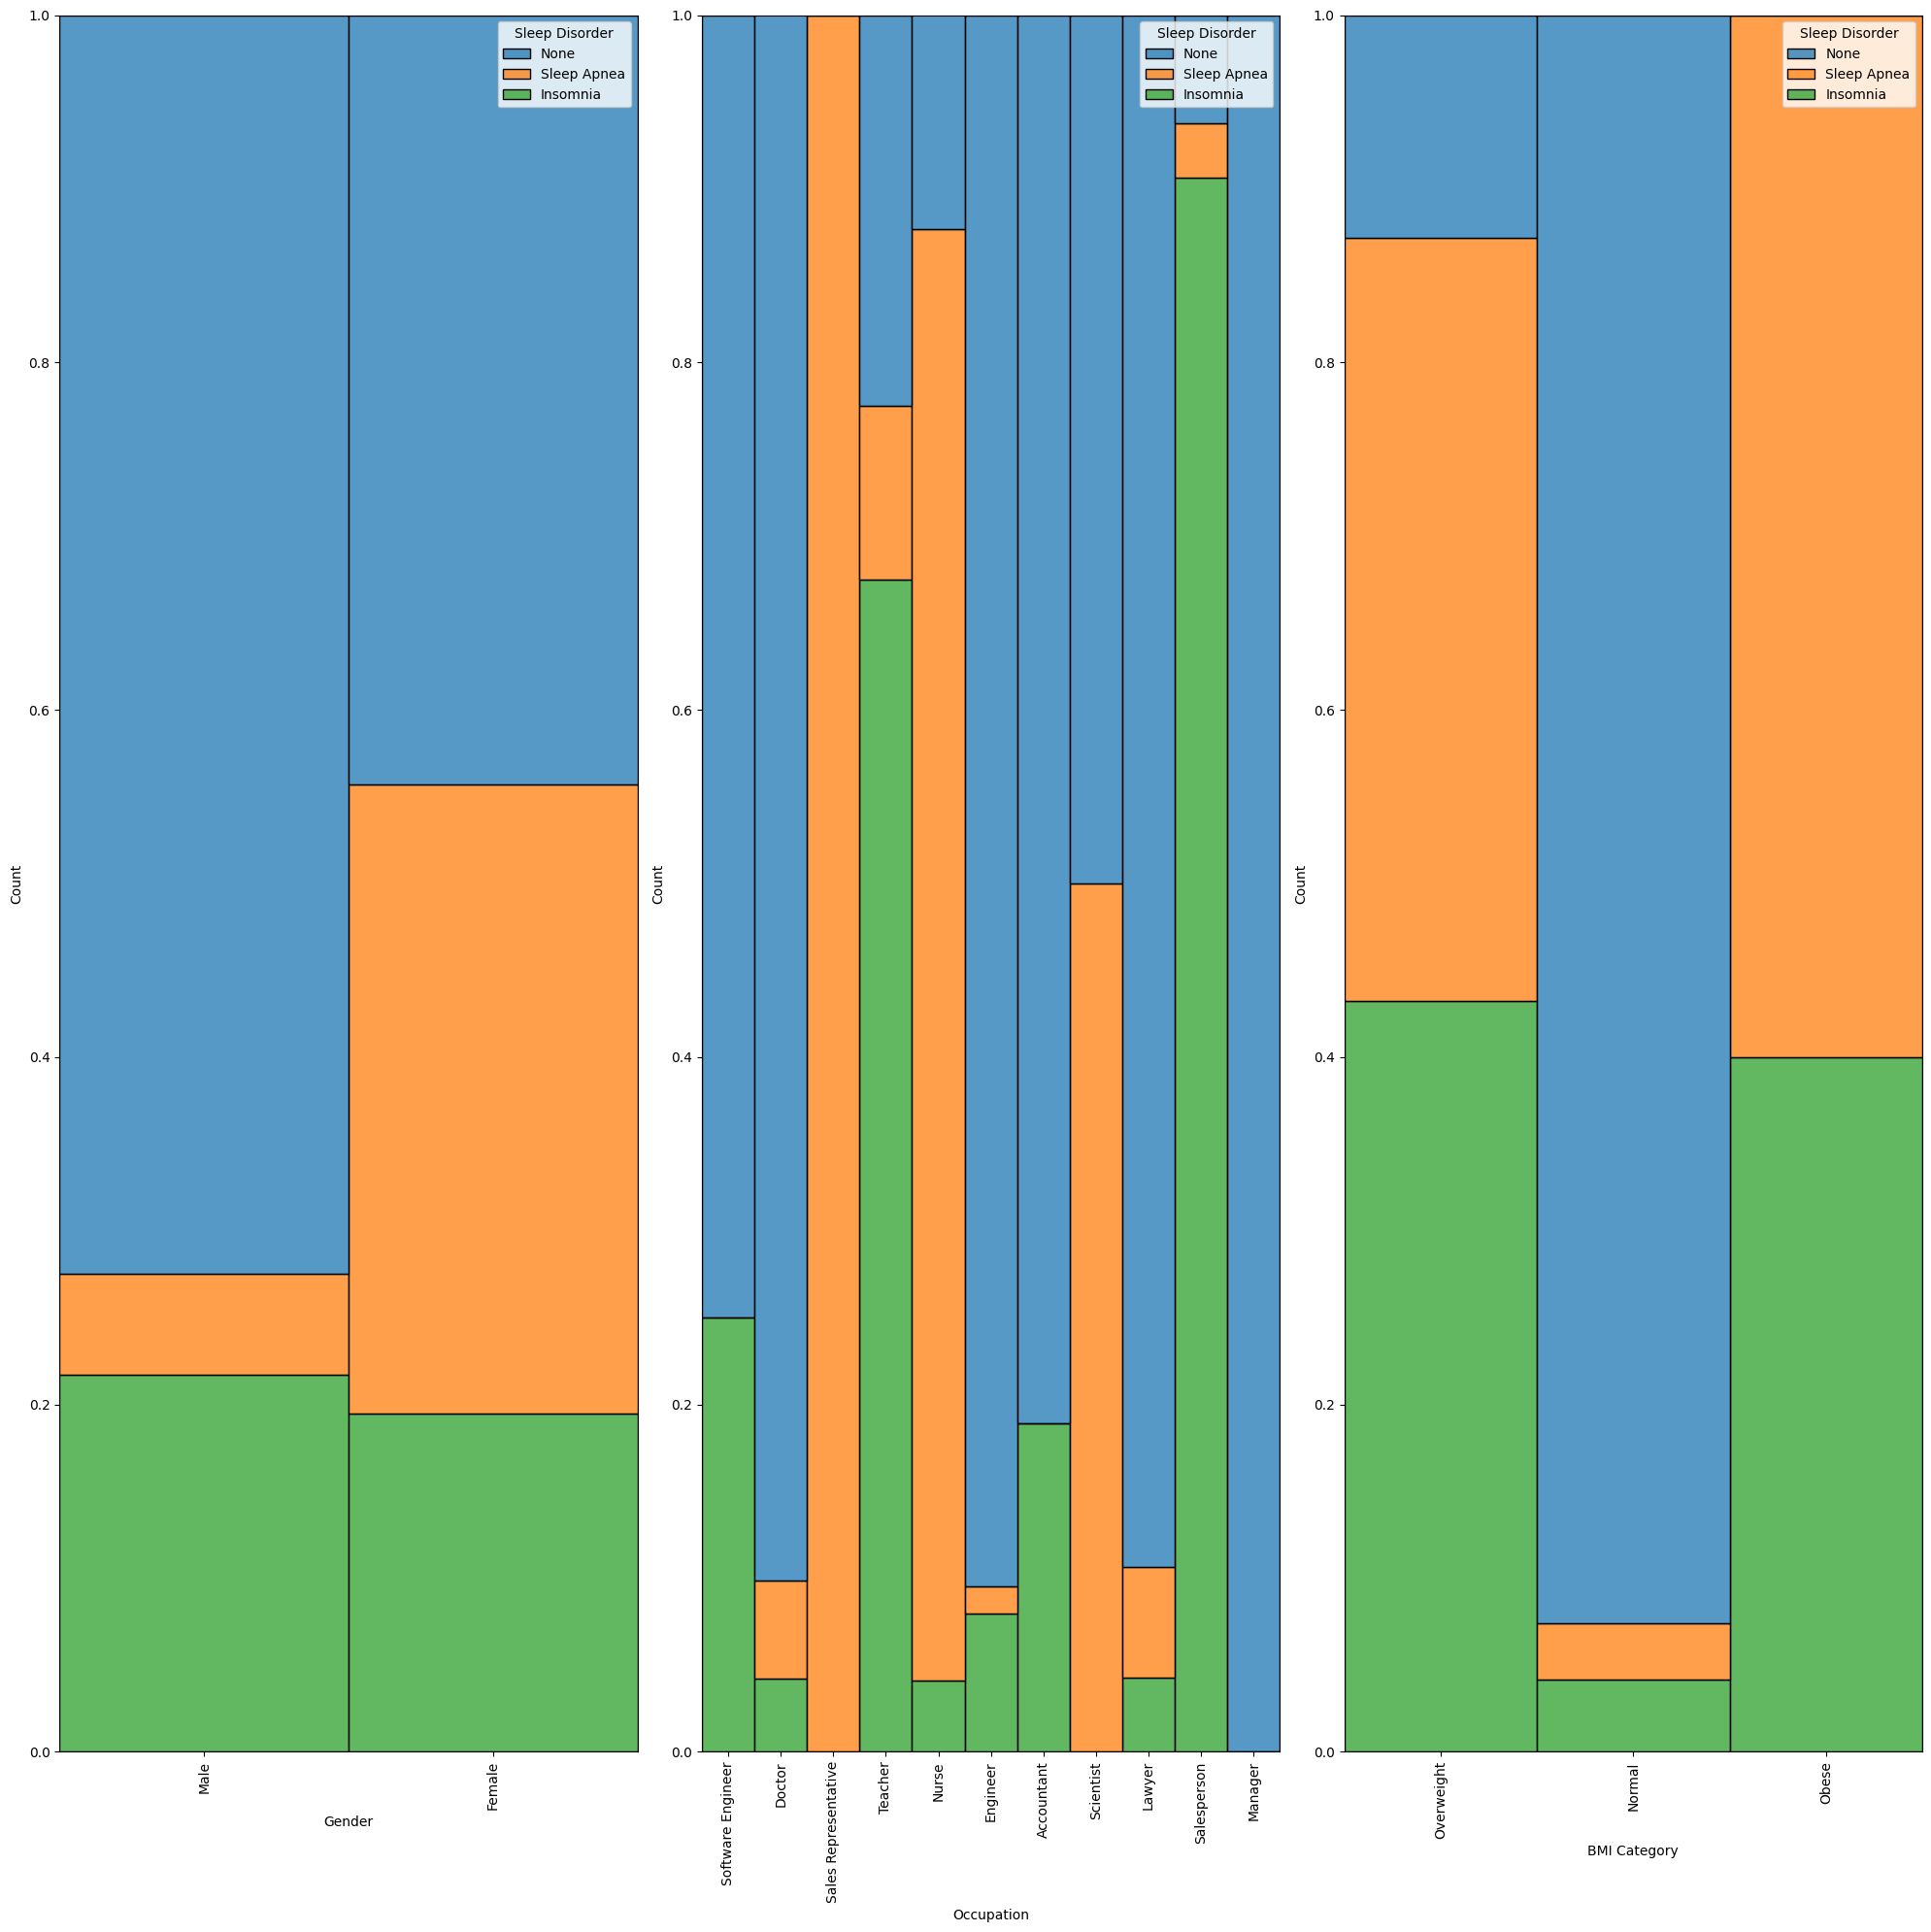

In [ ]:
fig,axs = plt.subplots(nrows = 1,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i, var in enumerate(catr_var):
    sns.histplot(x=var, hue="Sleep Disorder", data=data_01, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True)
    axs[i].set_xticklabels (data_01[var].unique(), rotation=90)
    axs[i].set_xlabel(var)
fig.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

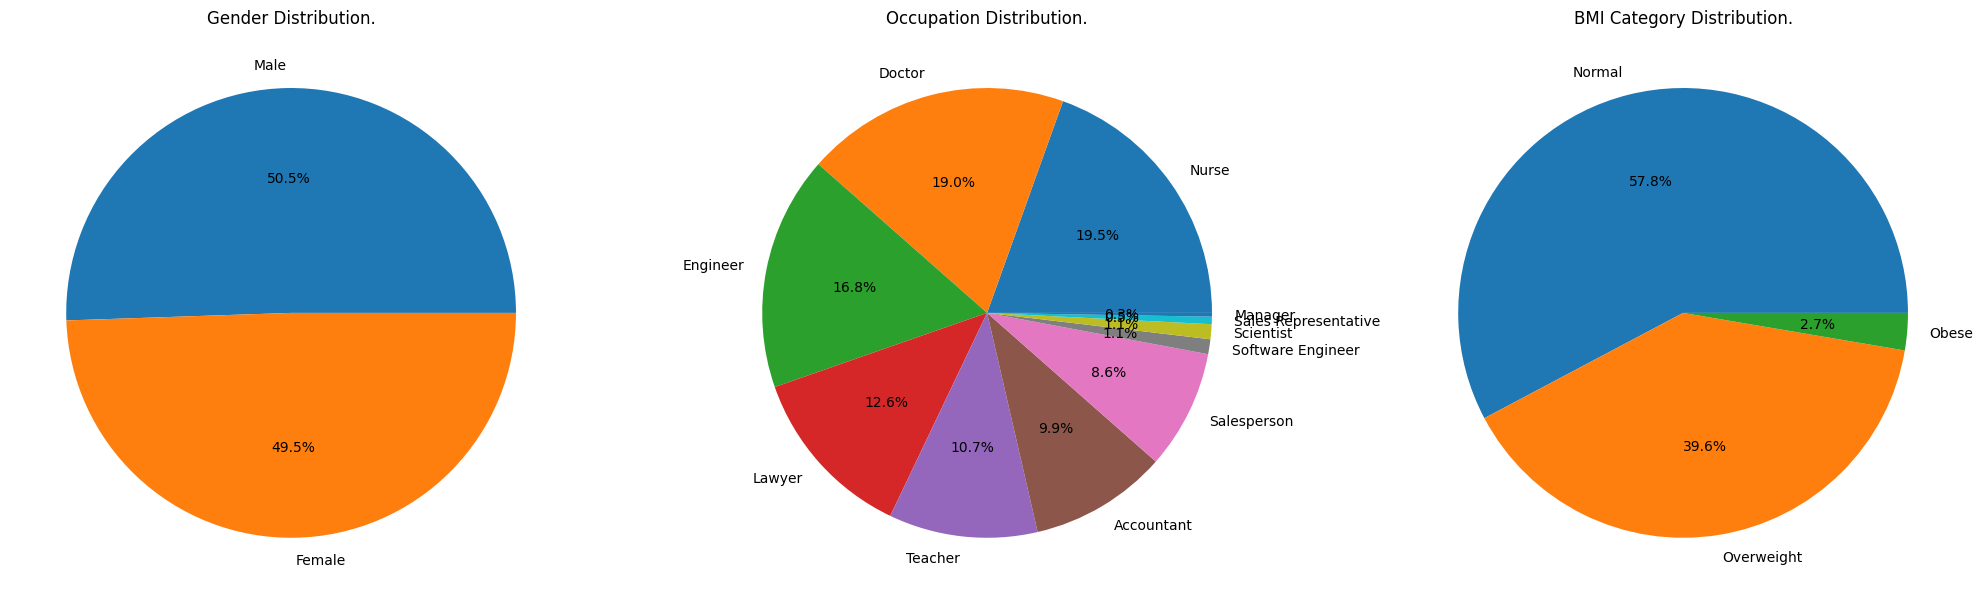

In [ ]:
max_categories = 5
fig,axs = plt.subplots(nrows = 1,ncols=3,figsize=(20,20))
for i, var in enumerate(catr_var):
    if i < len(axs.flat):
        cat_counts=data_01[var].value_counts()
        if len(catr_var) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(),index=["Other"])
            cat_counts = cat_counts_top.append(cat_counts_other)

        axs.flat[i].pie(cat_counts,labels = cat_counts.index,autopct  = "%1.1f%%" )

        axs.flat[i].set_title(f"{var} Distribution.")
fig.tight_layout()
plt.show

In [ ]:
num_vars = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level','Stress Level', 'Heart Rate', 'Daily Steps', 'BloodPressure01', 'BloodPressure02']

In [ ]:
data_01

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,BloodPressure01,BloodPressure02
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,Sleep Apnea,140,95


<ipython-input-16-8e66aa0e94e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-16-8e66aa0e94e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-16-8e66aa0e94e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-16-8e66aa0e94e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-16-8e66aa0e94e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-16-8e66aa0e94e3>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

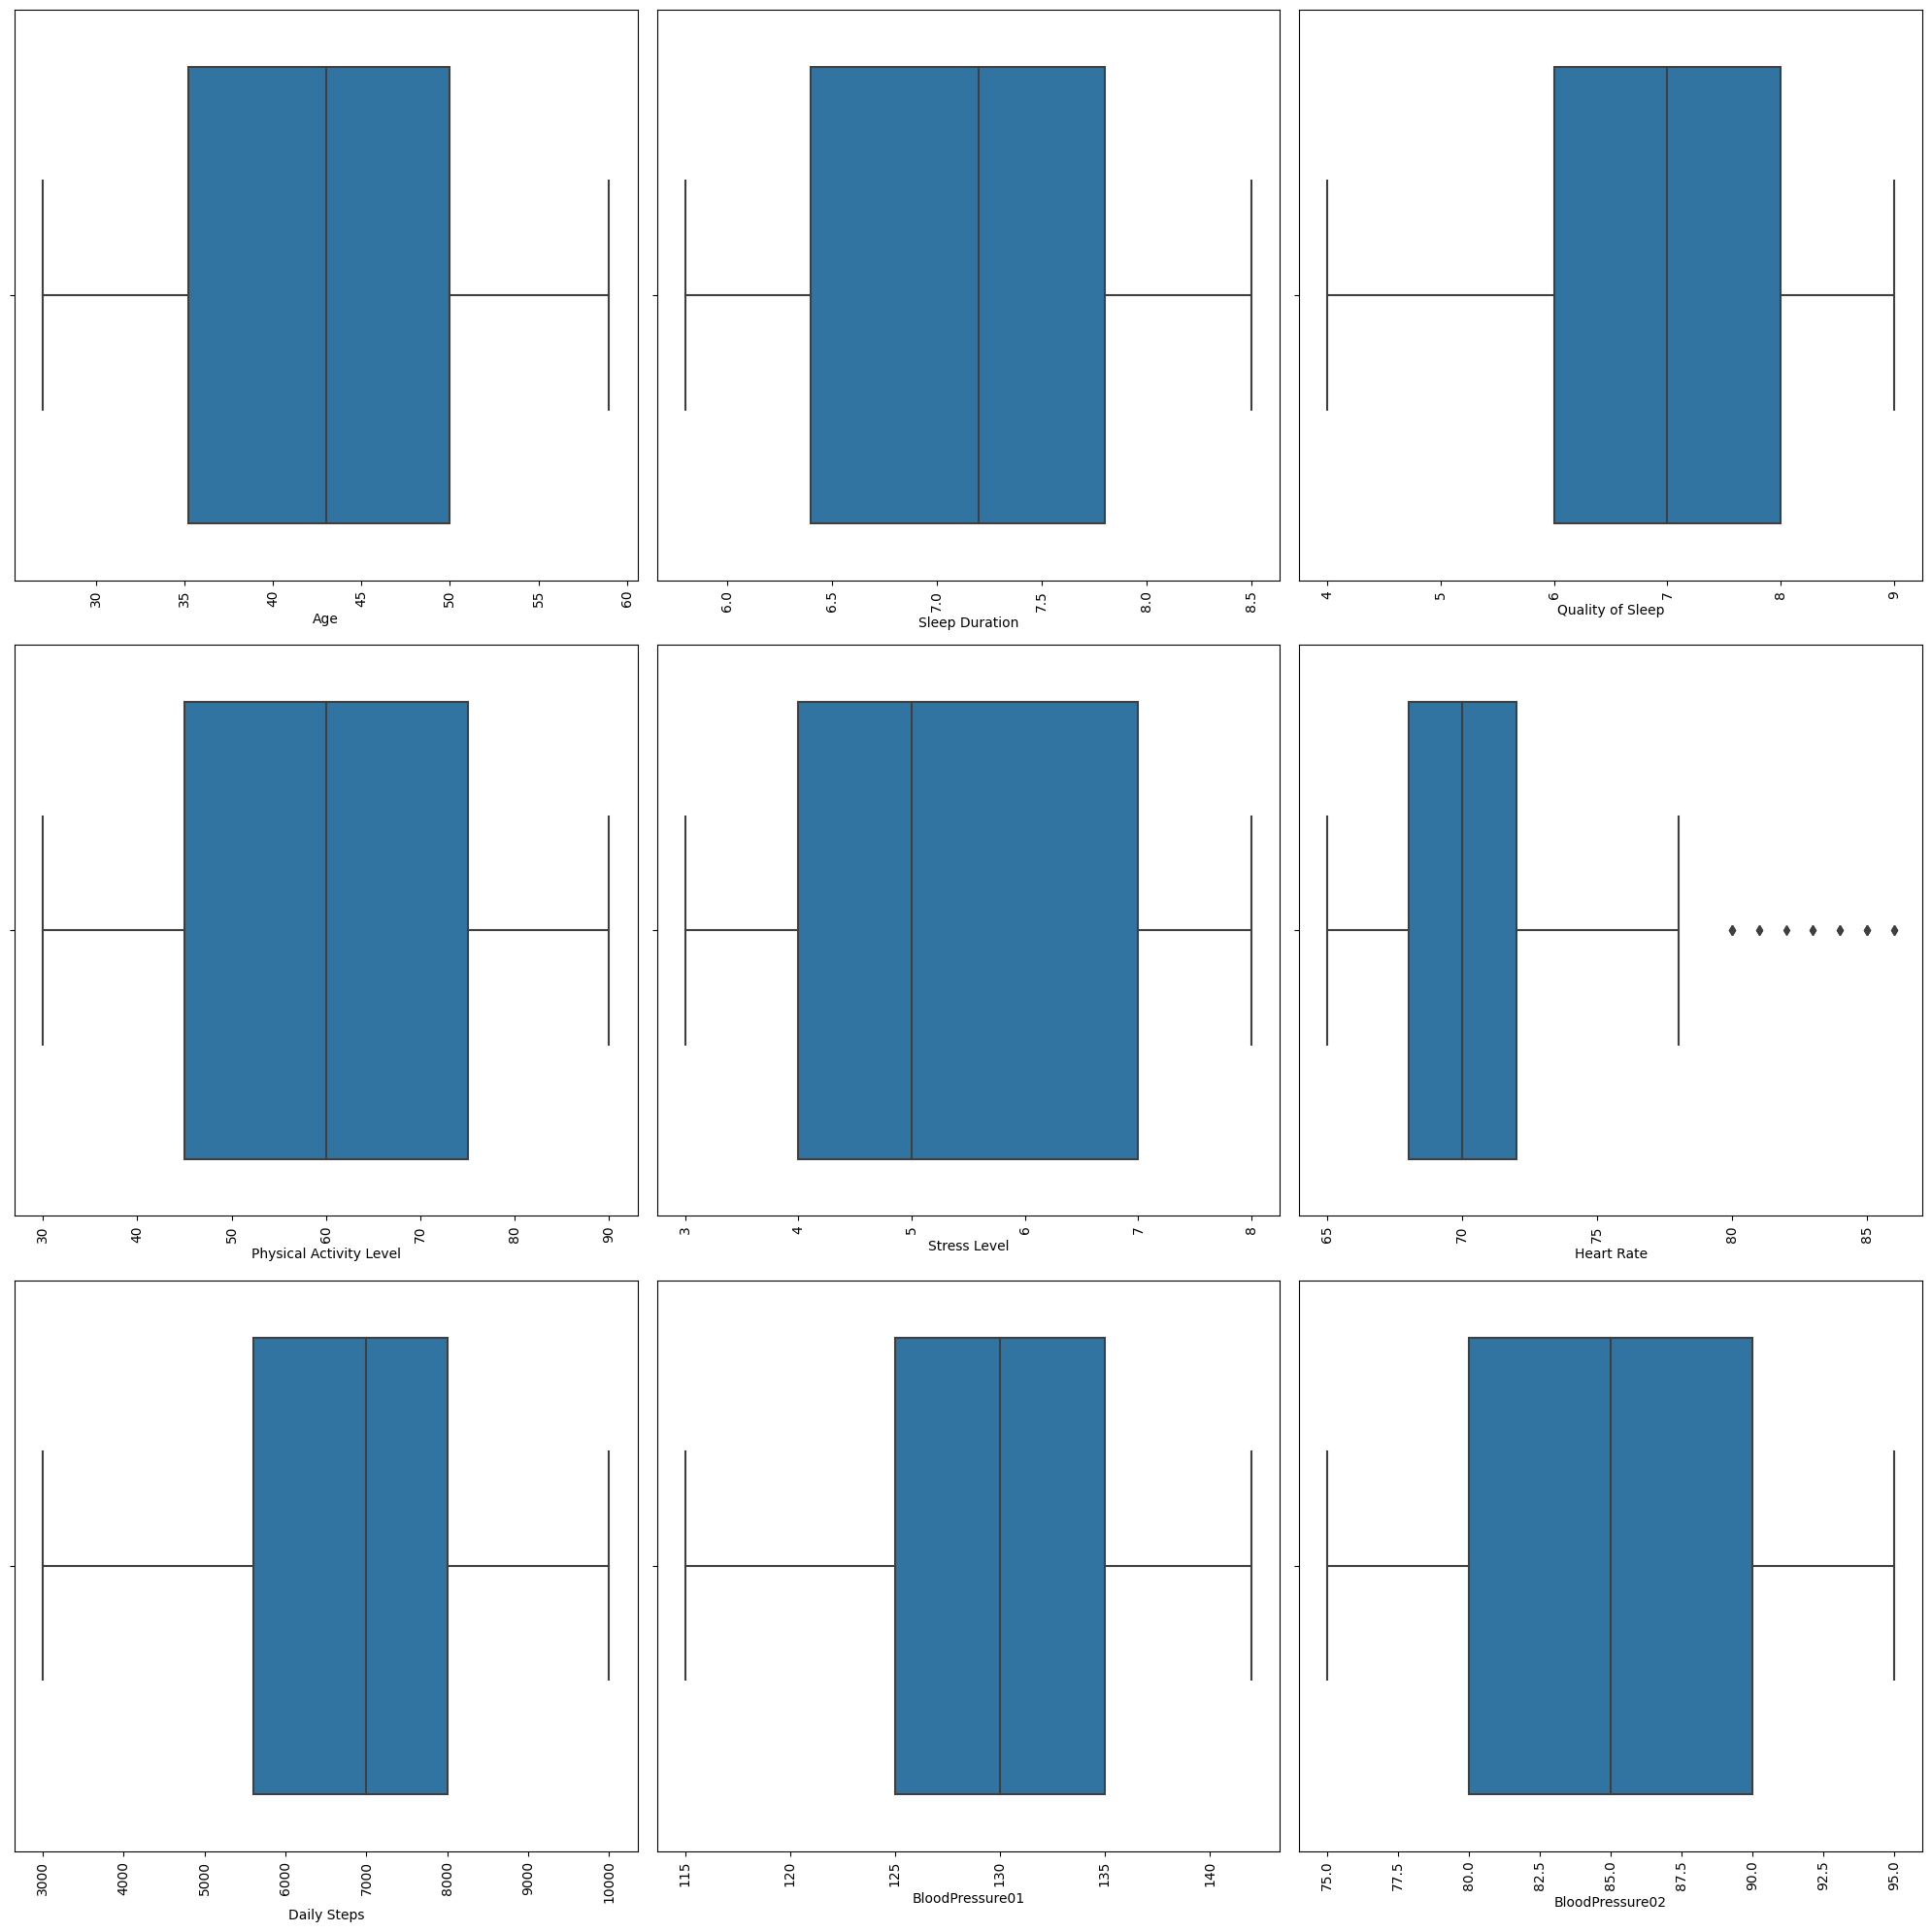

In [ ]:
fig,axs = plt.subplots(nrows = 3,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i,var in enumerate(num_vars):
    sns.boxplot(x=var, data=data_01, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

<ipython-input-17-490d93352418>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-17-490d93352418>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-17-490d93352418>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-17-490d93352418>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-17-490d93352418>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-17-490d93352418>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

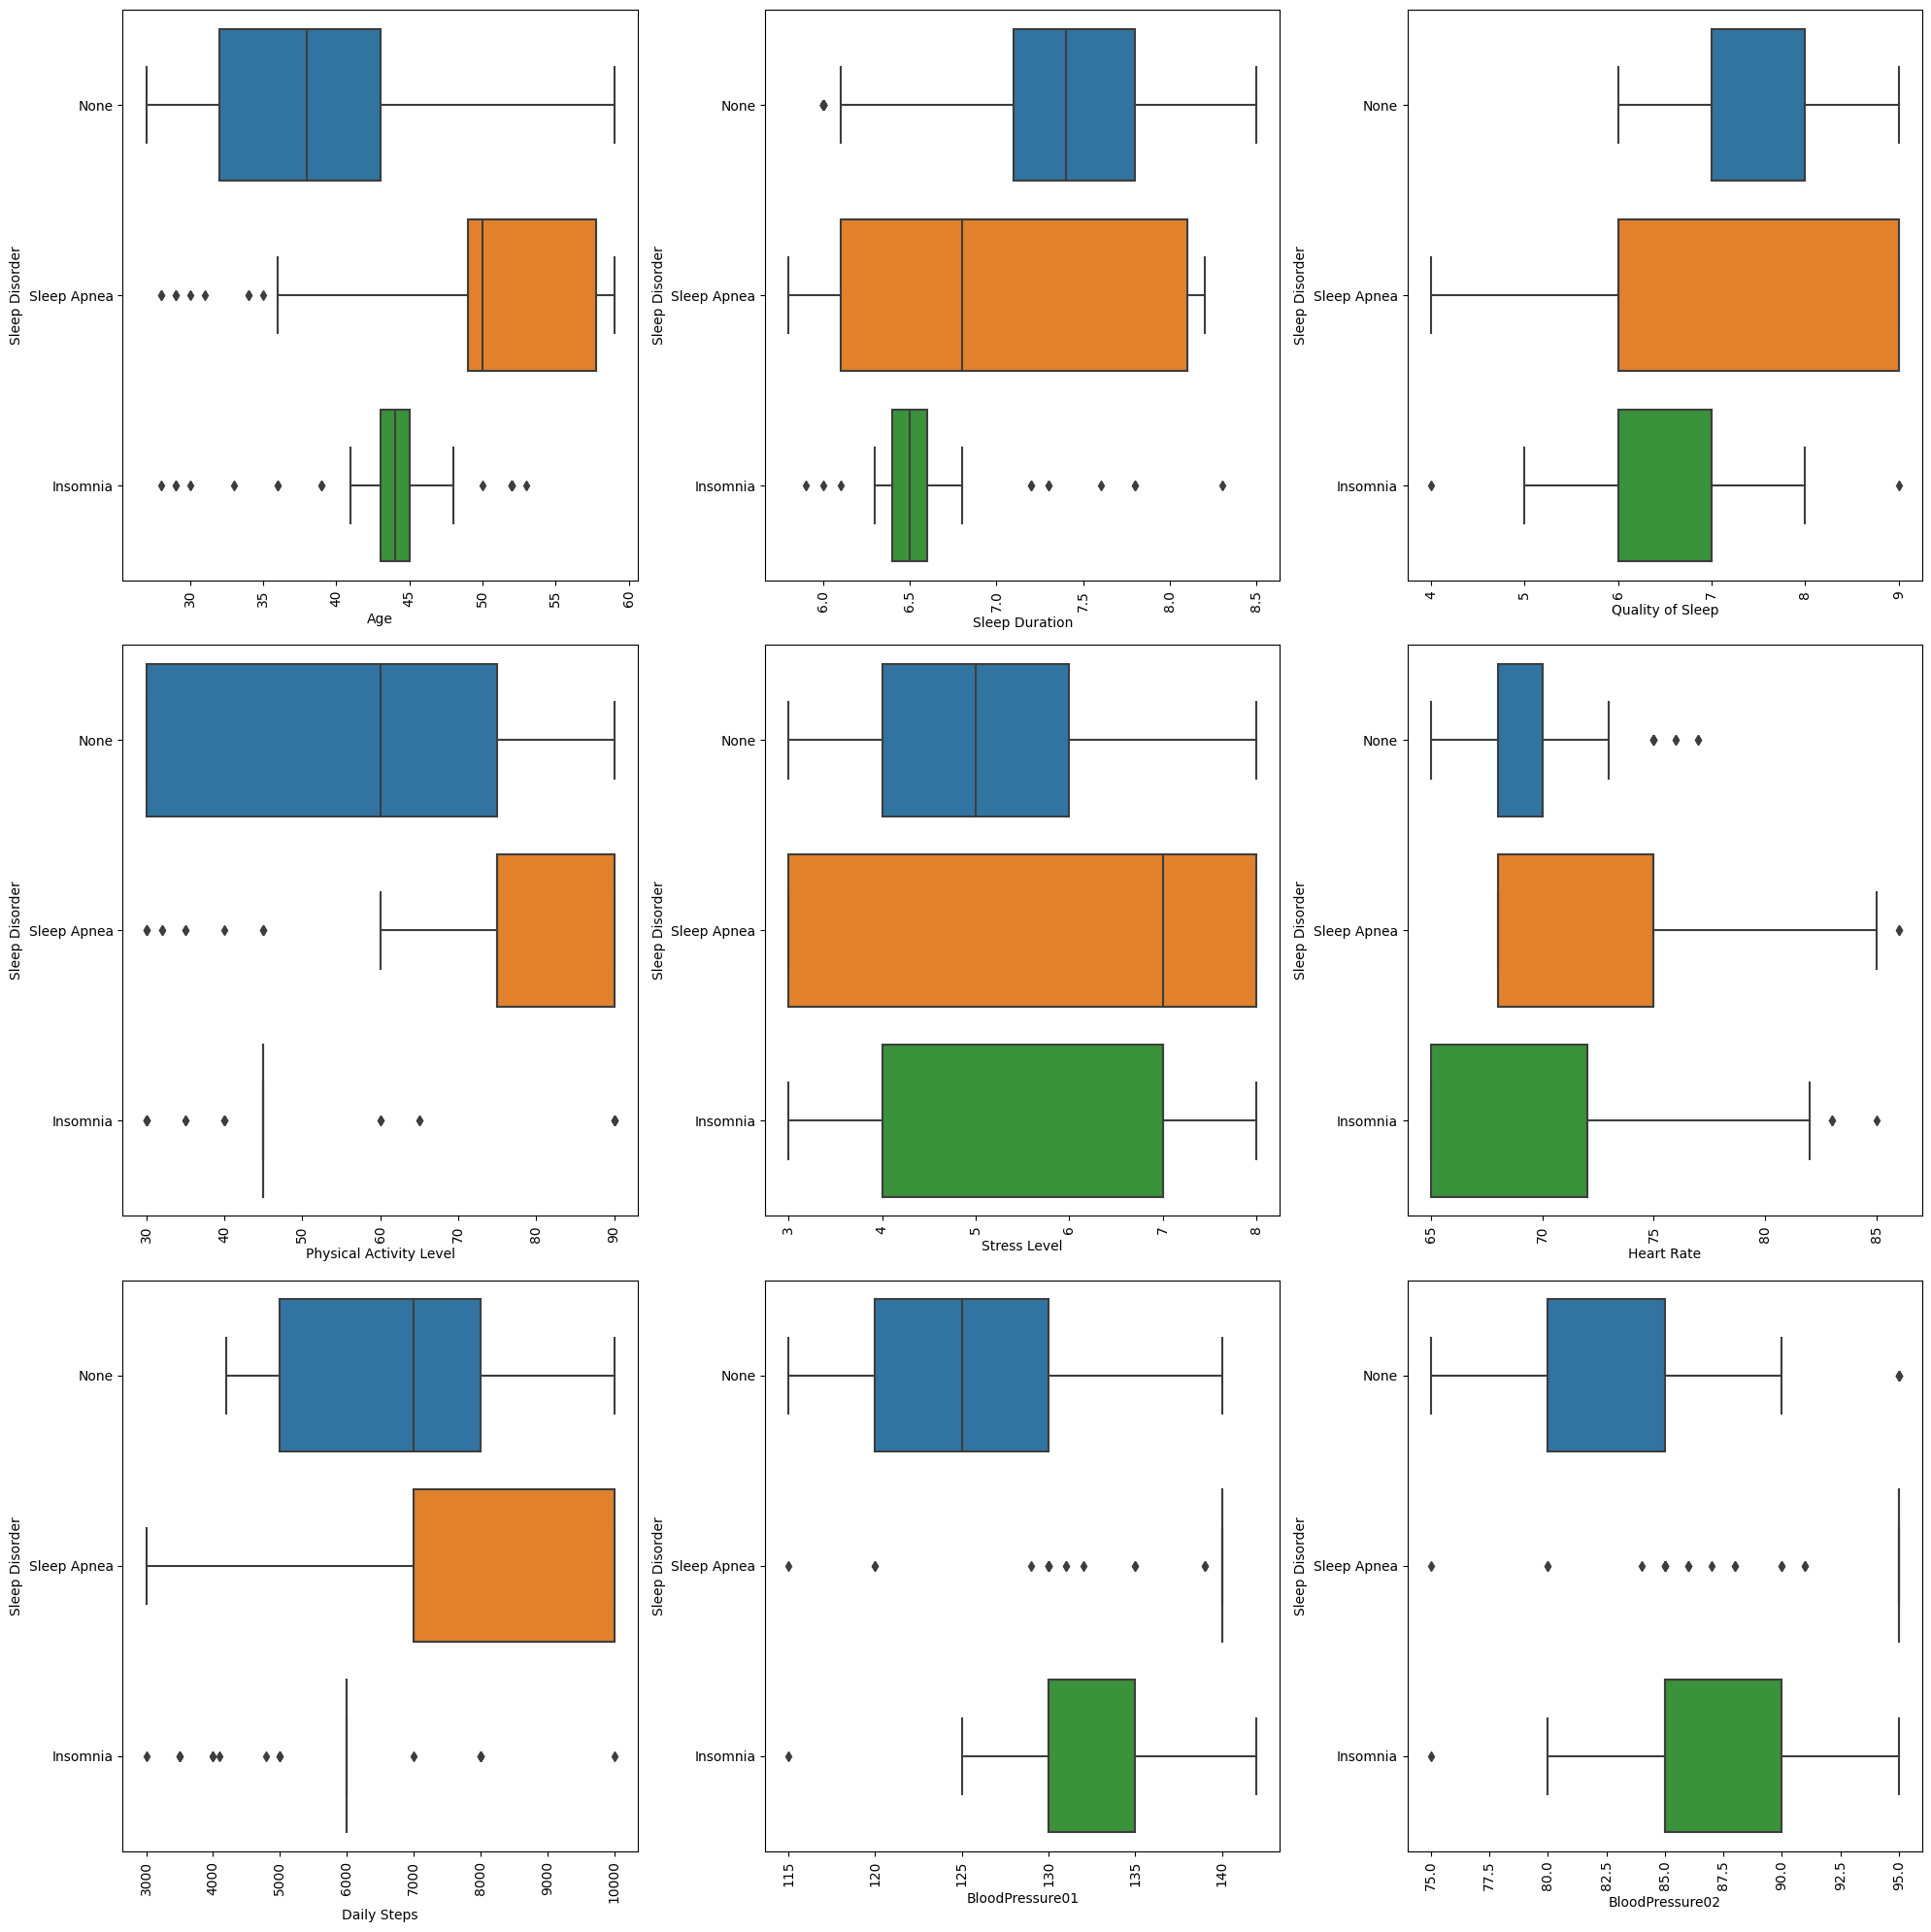

In [ ]:
fig,axs = plt.subplots(nrows = 3,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i,var in enumerate(num_vars):
    sns.boxplot(x=var,y = "Sleep Disorder", data=data_01, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

<ipython-input-18-db5bb4453941>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-db5bb4453941>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-db5bb4453941>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-db5bb4453941>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-db5bb4453941>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-18-db5bb4453941>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

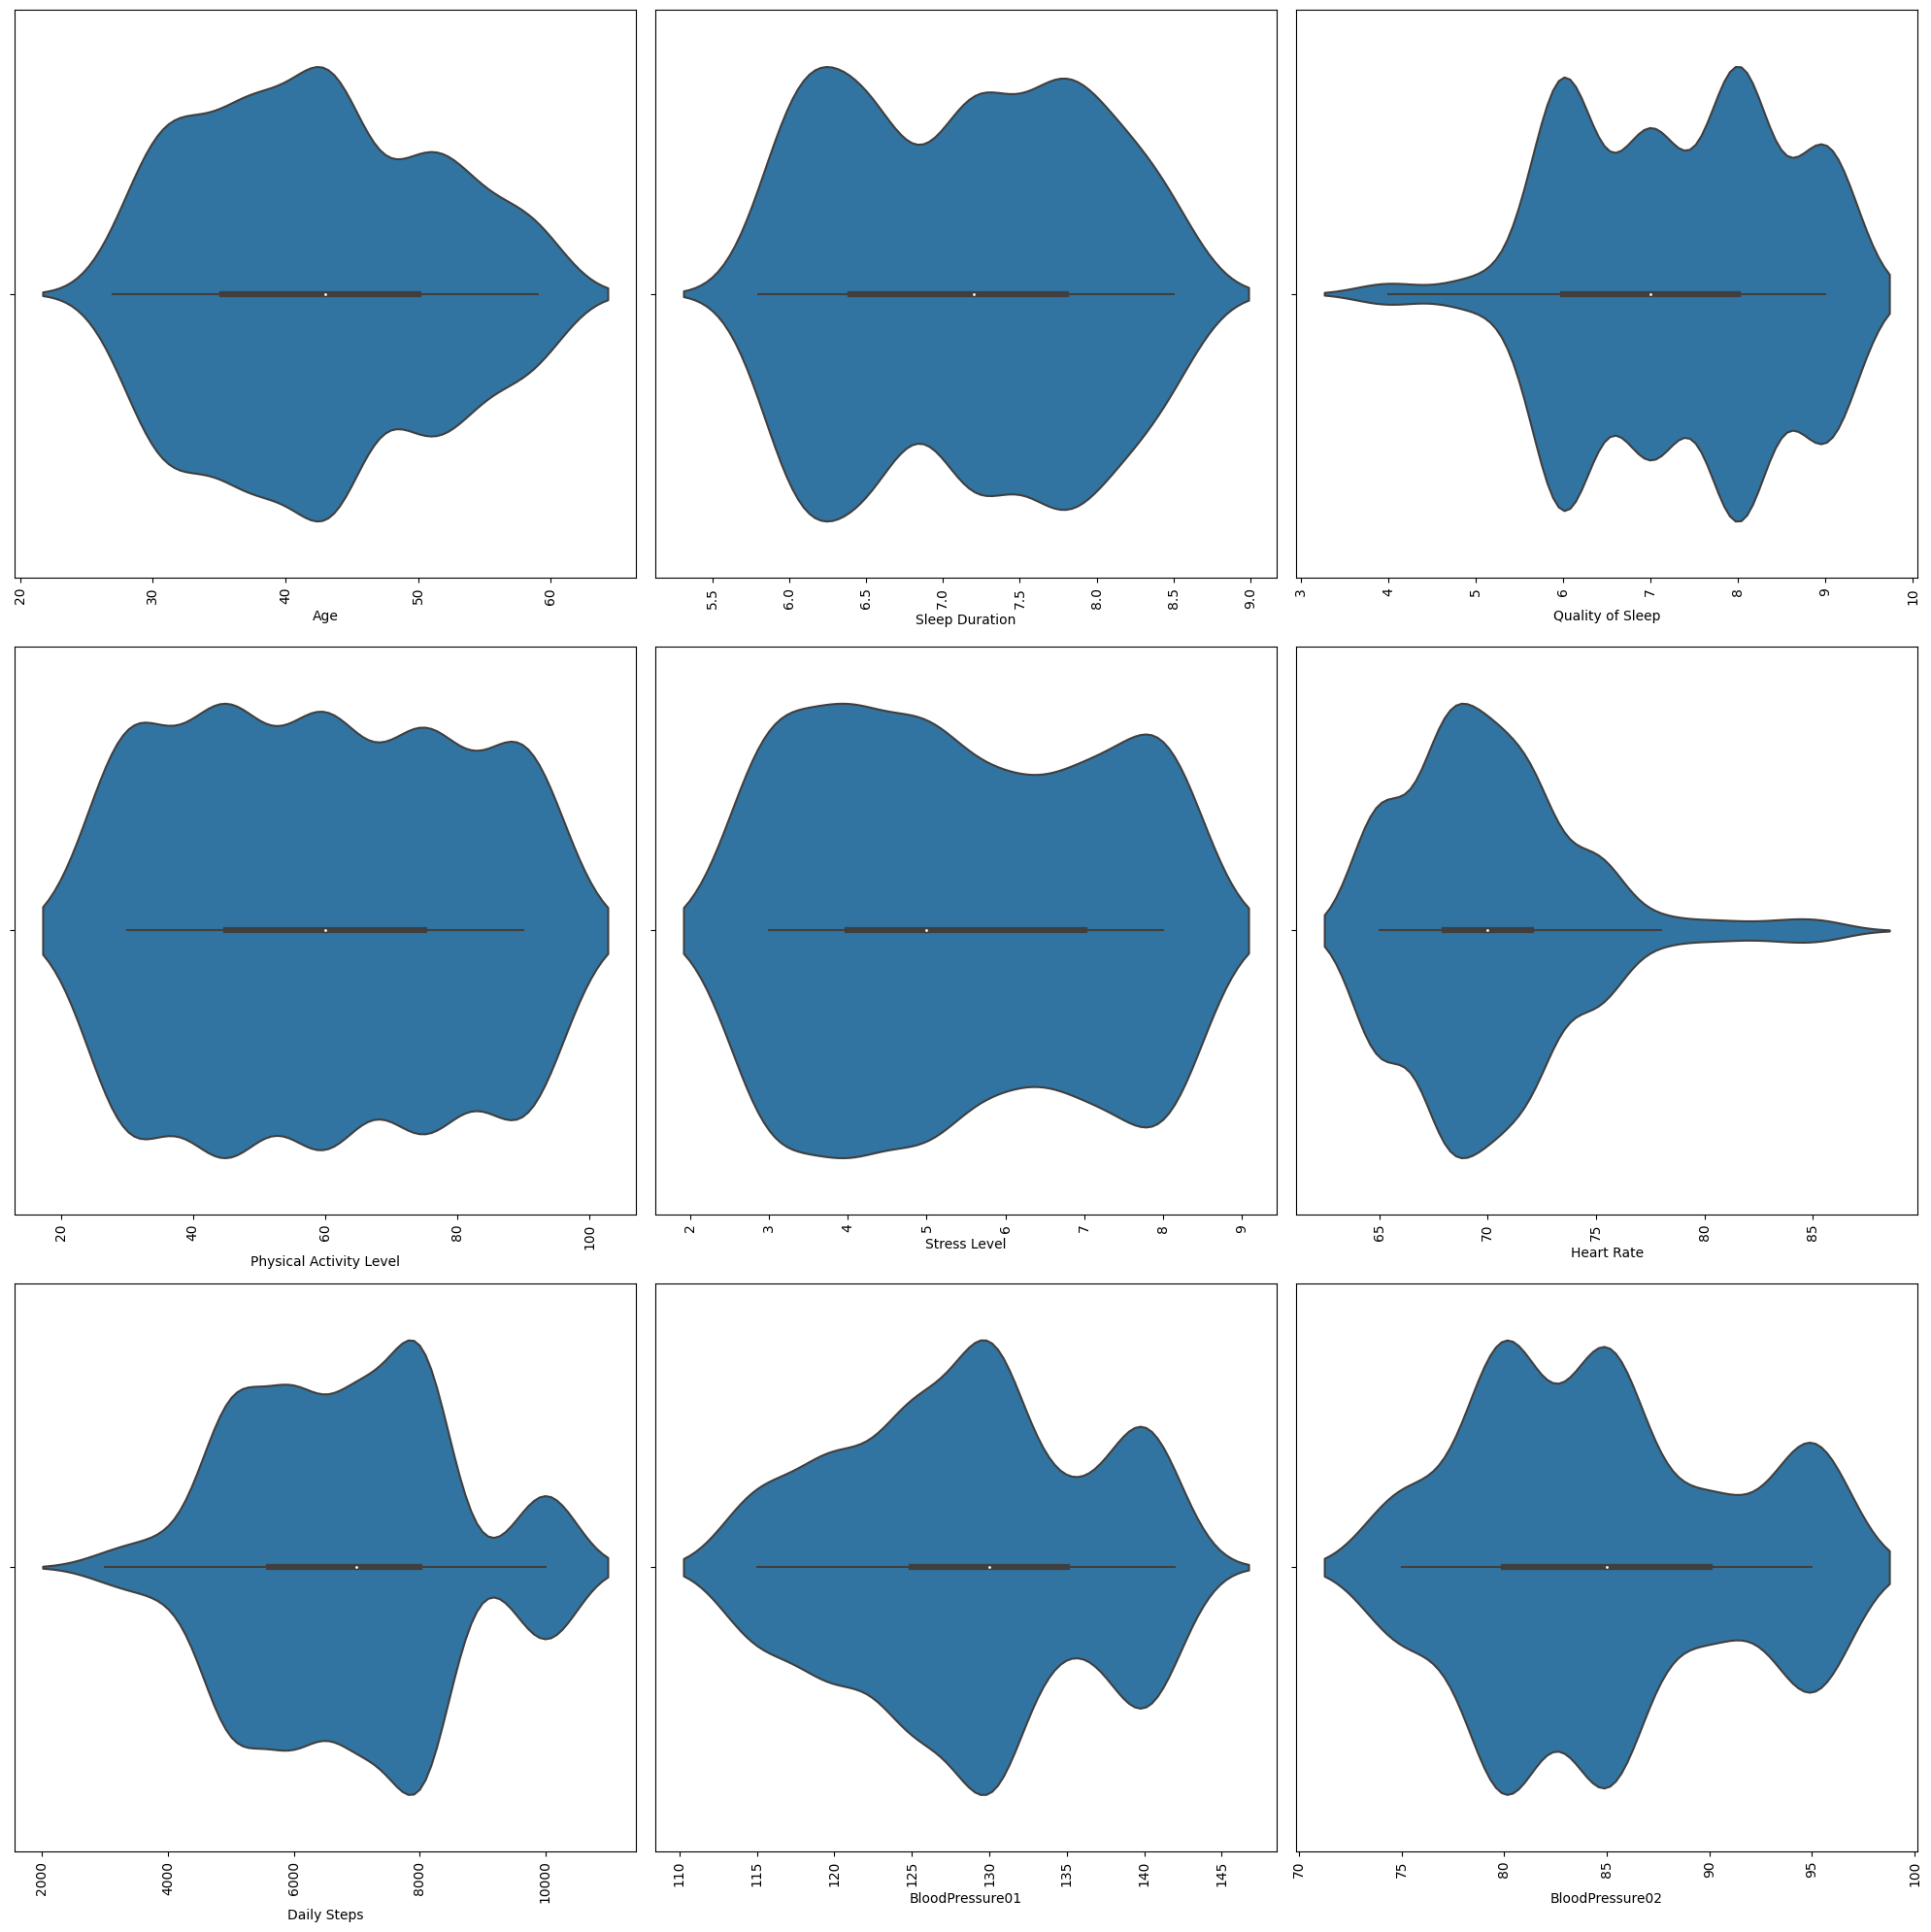

In [ ]:
fig,axs = plt.subplots(nrows = 3,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i,var in enumerate(num_vars):
    sns.violinplot(x=var, data=data_01, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

<ipython-input-19-6a827620c634>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-19-6a827620c634>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-19-6a827620c634>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-19-6a827620c634>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-19-6a827620c634>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
<ipython-input-19-6a827620c634>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xtickla

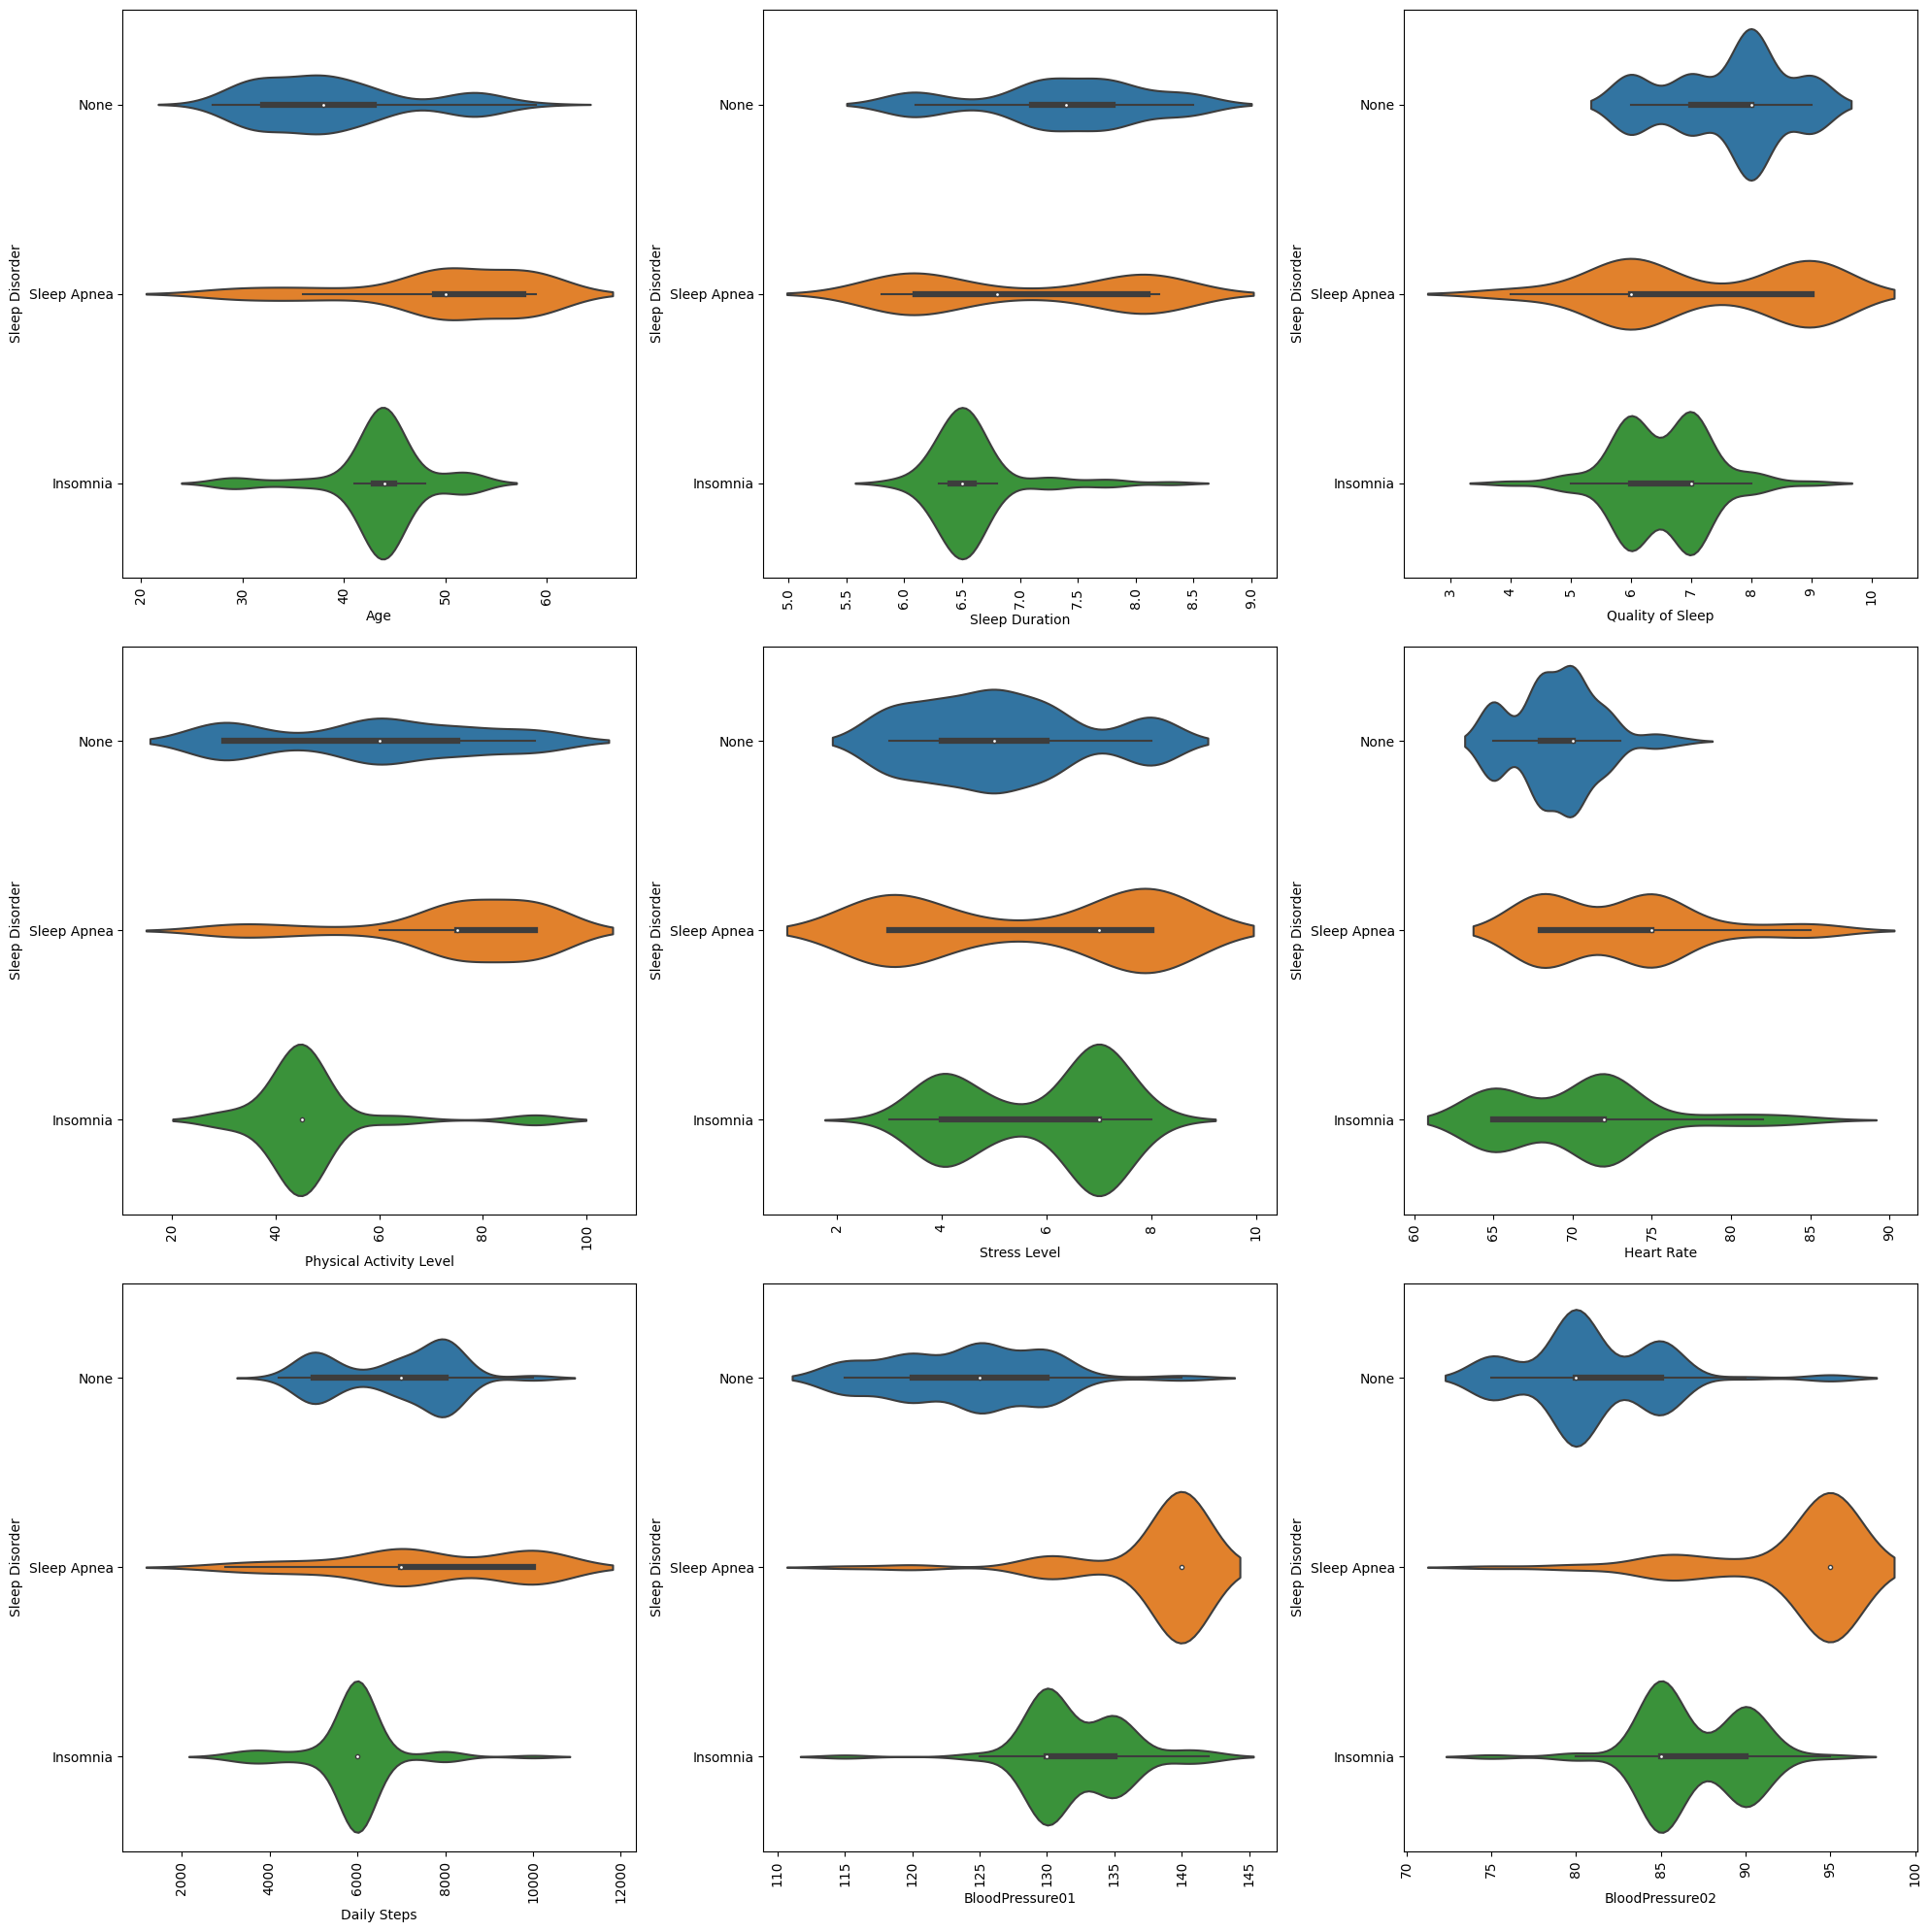

In [ ]:
fig,axs = plt.subplots(nrows = 3,ncols=3,figsize=(20,20))
axs = axs.flatten()
for i,var in enumerate(num_vars):
    sns.violinplot(x=var,y = "Sleep Disorder", data=data_01, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
fig.tight_layout()
plt.show()

In [ ]:
check_missing=data_01.isnull().sum() * 100 / data_01.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
for col in data_01.select_dtypes (include=['object']).columns:
    print(f"{col}: {data_01[col].unique()}")

Gender: ['Male' 'Female']
Occupation: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']
BMI Category: ['Overweight' 'Normal' 'Obese']
Sleep Disorder: ['None' 'Sleep Apnea' 'Insomnia']


In [ ]:
for col in data_01.select_dtypes (include=['object']).columns:
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    # Fit the encoder to the unique values in the column
    label_encoder.fit(data_01[col].unique())
    # Transform the column using the encoder
    data_01[col] = label_encoder.transform(data_01[col])
    # Print the column name and the unique encoded values
    print(f"{col}:{data_01[col].unique()}")

Gender:[1 0]
Occupation:[ 9  1  6 10  5  2  0  8  3  7  4]
BMI Category:[2 0 1]
Sleep Disorder:[1 2 0]


<Axes: >

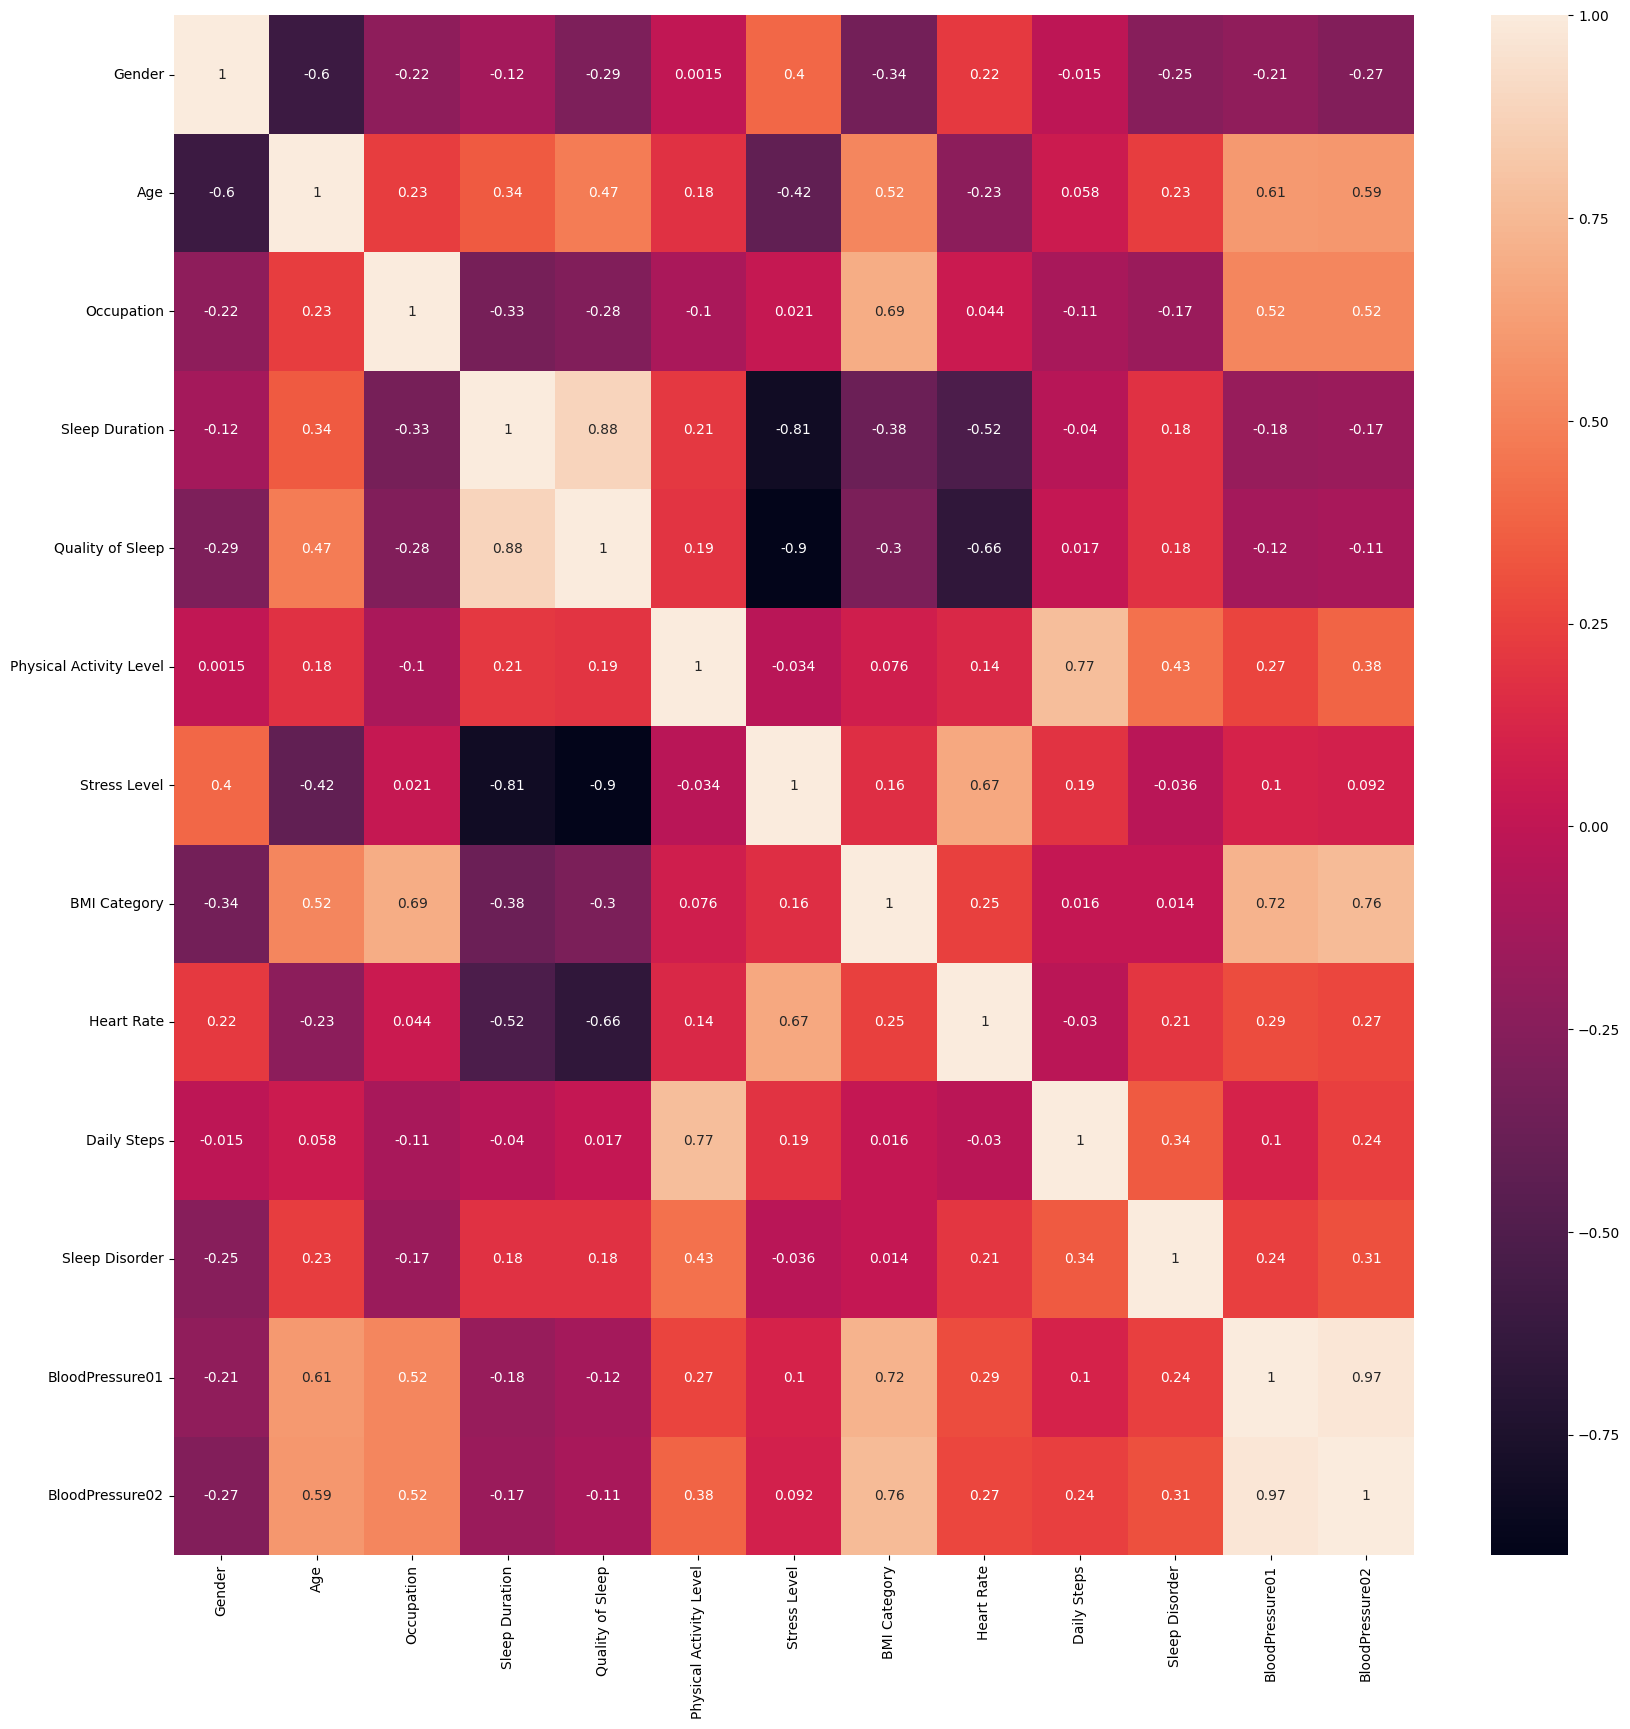

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(data_01.corr(), fmt='.2g', annot=True)

In [ ]:
print("The End")

The End
